In [1]:
import numpy as np
from scipy.fftpack import fft
import random
import librosa
import librosa.display
import matplotlib.pyplot as plt

sys_values = False
if (sys_values):
    import sys
    print("sys.executable: ", sys.executable)
    print("-----------------")
    !type python
    print("-----------------")
    from pprint import pprint as p
    p(sys.path)

/var/folders/5f/rgfnh64x7k1bfzln9qq9n76r0000gr/T/ipykernel_96694/2084843523.py:13: UserWarning: PySoundFile failed. Trying audioread instead.
  x, sr = librosa.load(audio_path, sr=None)
/Users/brash/anaconda3/lib/python3.11/site-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


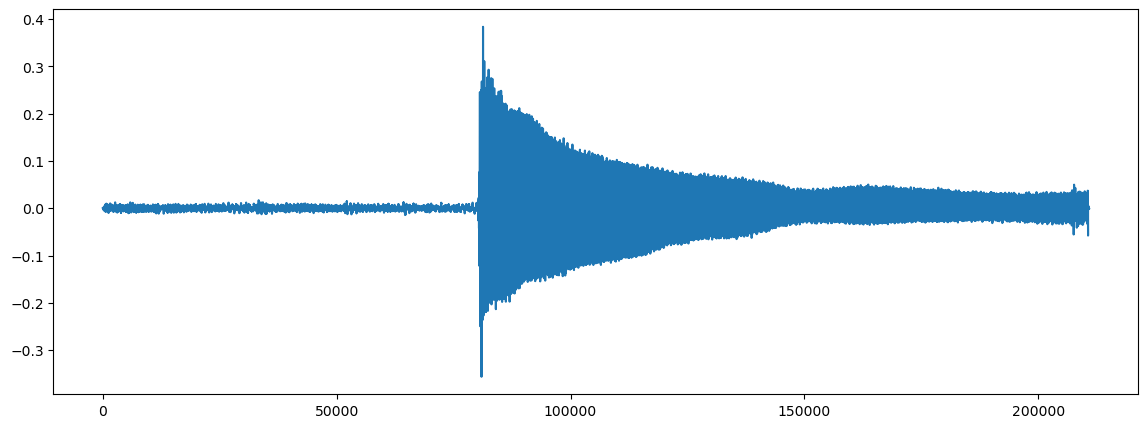

In [2]:
choice = 3

if (choice == 1):
    audio_path = './LowE.mp4'
    start_time = 2.18
elif (choice == 2):
    audio_path = './MidE.mp4'
    start_time = 2.38
elif (choice == 3):
    audio_path = './HighE.mp4'
    start_time = 1.88

x, sr = librosa.load(audio_path, sr=None)

plt.figure(figsize=(14, 5))
plt.plot(x)

/var/folders/5f/rgfnh64x7k1bfzln9qq9n76r0000gr/T/ipykernel_96694/555285498.py:1: UserWarning: PySoundFile failed. Trying audioread instead.
  y1, sr1 = librosa.load(audio_path, offset=start_time,duration=0.160,sr=None)
/Users/brash/anaconda3/lib/python3.11/site-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
/var/folders/5f/rgfnh64x7k1bfzln9qq9n76r0000gr/T/ipykernel_96694/555285498.py:2: UserWarning: PySoundFile failed. Trying audioread instead.
  y2, sr2 = librosa.load(audio_path, offset=start_time+3.20-2*0.320,duration=0.160,sr=None)


(0.0, 500.0)

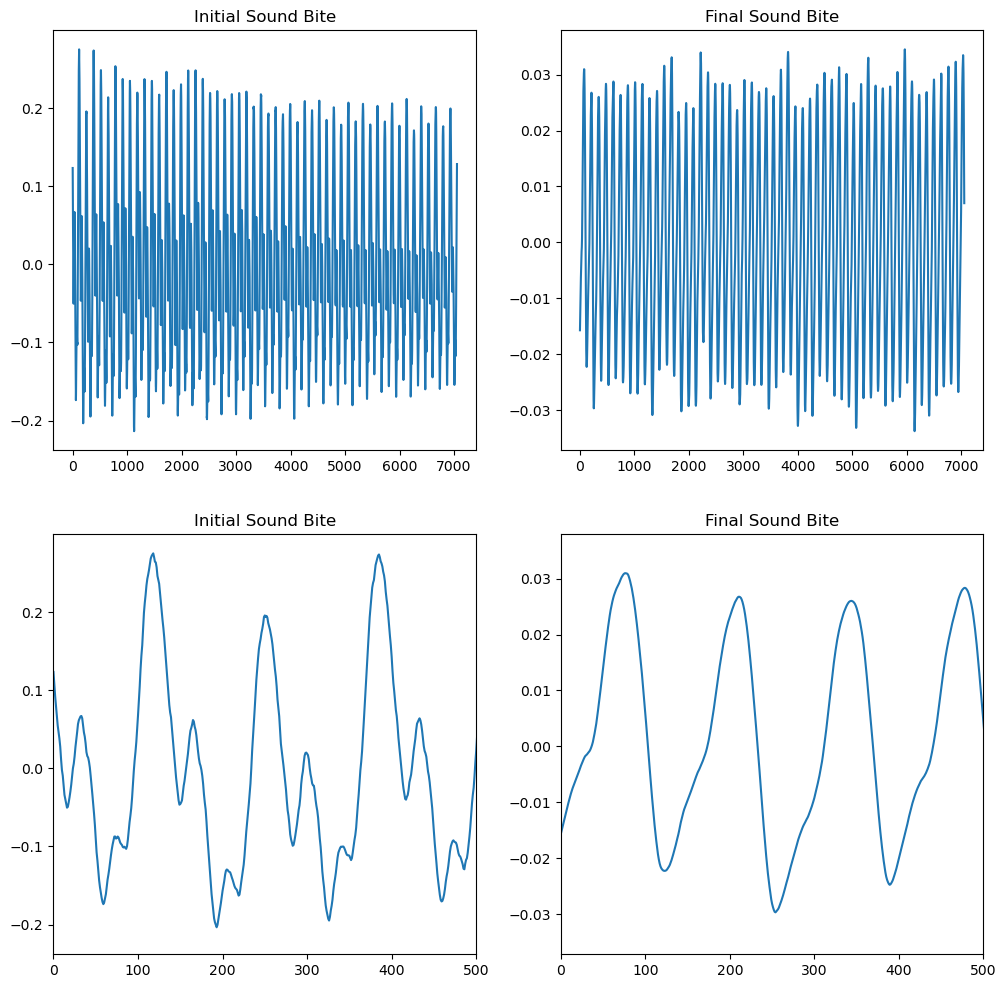

In [3]:
y1, sr1 = librosa.load(audio_path, offset=start_time,duration=0.160,sr=None)
y2, sr2 = librosa.load(audio_path, offset=start_time+3.20-2*0.320,duration=0.160,sr=None)

fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(12,12))

#librosa.display.waveshow(y)
ax[0][0].plot(y1)
ax[0][1].plot(y2)
ax[0][0].set_title("Initial Sound Bite")
ax[0][1].set_title("Final Sound Bite")
ax[1][0].plot(y1)
ax[1][1].plot(y2)
ax[1][0].set_title("Initial Sound Bite")
ax[1][1].set_title("Final Sound Bite")
ax[1][0].set_xlim(0,500)
ax[1][1].set_xlim(0,500)

In [4]:
sp1 = np.fft.fft(y1)
dt1 = 1.0/sr1
nframes = len(y1)
f1 = []
t1 = []
power1 = []
for i in range(int(len(y1)/2)):
    t1.append(i*dt1)
    f1.append(i/(nframes*dt1))
    power1.append(sp1.real[i]**2+sp1.imag[i]**2)
t1 = np.array(t1)
f1 = np.array(f1)
power1 = np.array(power1)

sp2 = np.fft.fft(y2)
dt2 = 1.0/sr2
nframes = len(y2)
f2 = []
t2 = []
power2 = []
for i in range(int(len(y2)/2)):
    t2.append(i*dt2)
    f2.append(i/(nframes*dt2))
    power2.append(sp2.real[i]**2+sp2.imag[i]**2)
t2 = np.array(t2)
f2 = np.array(f2)
power2 = np.array(power2)

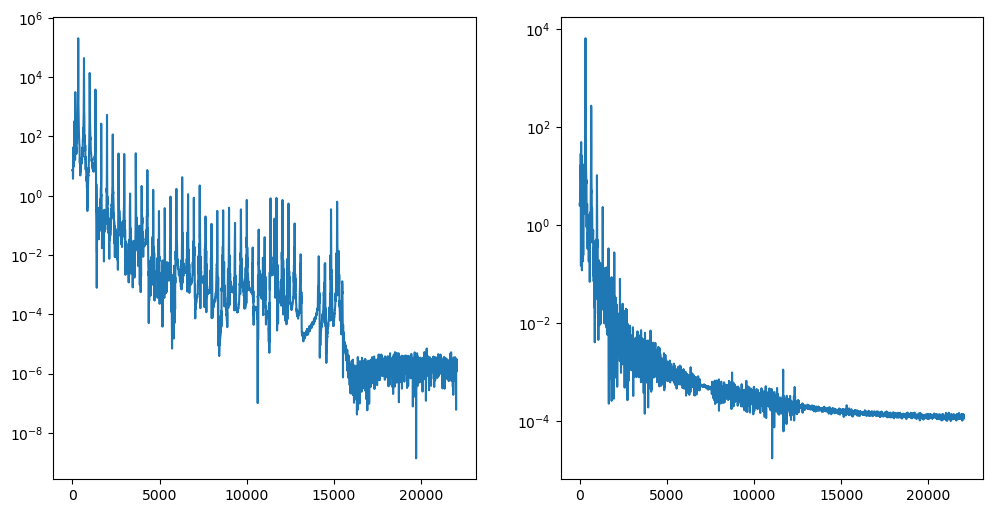

In [5]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12,6))
ax[0].plot(f1, power1)
ax[1].plot(f2, power2)
ax[0].set_yscale("log")
ax[1].set_yscale("log")

NameError: name 'powerfft1' is not defined

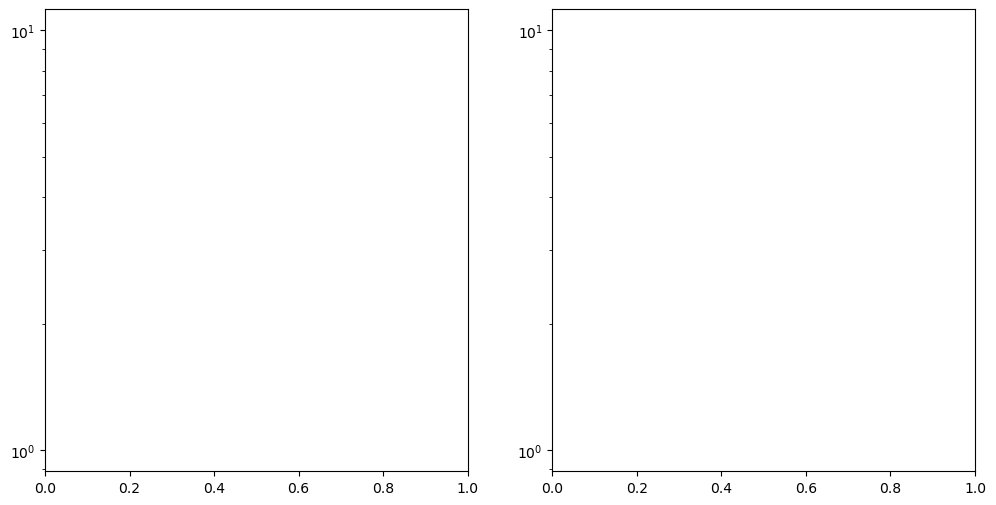

In [6]:
fig2, axs2 = plt.subplots(nrows=1, ncols=2, figsize=(12,6)) 
axs2[0].set_yscale("log")
axs2[1].set_yscale("log")

axs2[0].plot(f1,powerfft1)
axs2[0].set_xlim(0,3000)
axs2[1].plot(f2,powerfft2)
axs2[1].set_xlim(0,3000)

if (choice == 1):
    e_nominal = 82.407
elif (choice == 2):
    e_nominal = 164.814
elif (choice == 3):
    e_nominal = 329.628
    
efreq = [e_nominal*i for i in range(1,10)]

for i in range(len(efreq)):
    vliney = []
    vlinex = []
    vlinex.append(efreq[i])
    vliney.append(0.001)
    vlinex.append(efreq[i])
    vliney.append(0.0025)
    axs2[0].plot(vlinex,vliney)
    axs2[1].plot(vlinex,vliney)
